# Компьютерная геометрия и геометрическое моделирование
## Лабораторная работа №5
- Ф.И.О: **Мухамедияр Адиль**
- Ноиер студ. билета: **1032205725**
- Группа: **НКНбд-01-20**

In [27]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon, RegularPolygon
import numpy as np
from PIL import Image
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

## №1

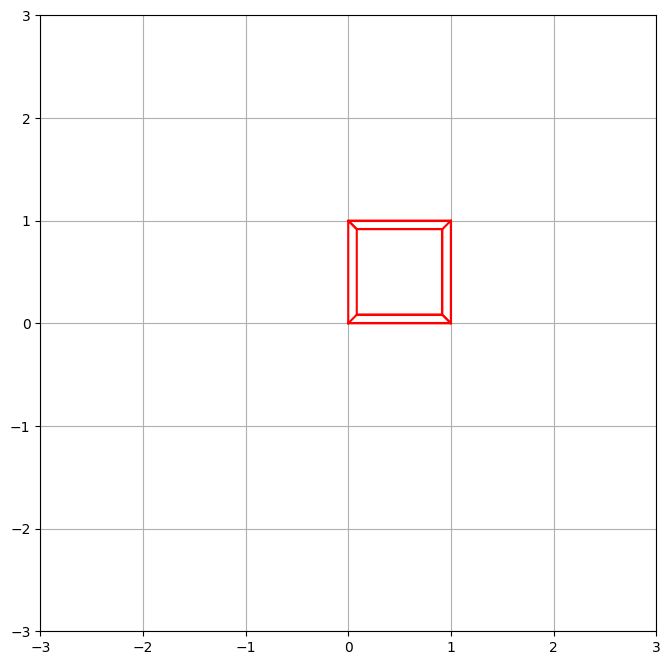

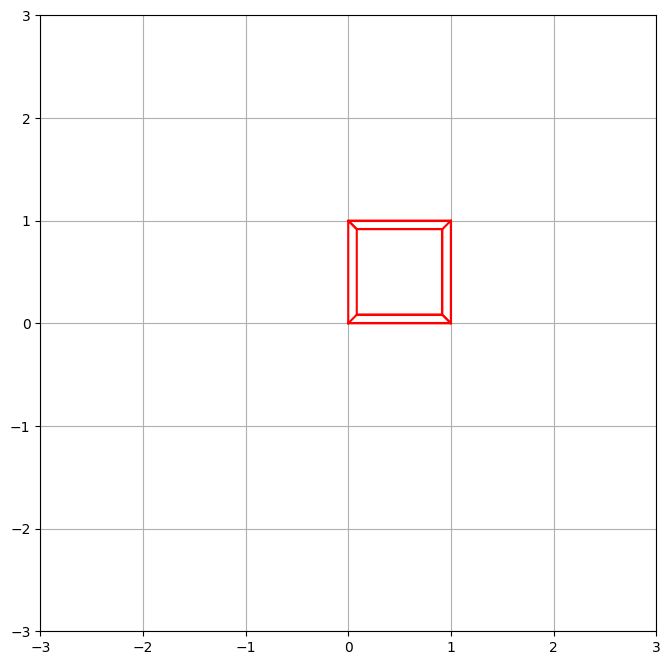

In [18]:

# Define the vertices of the unit cube
vertices = np.array([[0, 0, 0],
                     [1, 0, 0],
                     [1, 1, 0],
                     [0, 1, 0],
                     [0, 0, 1],
                     [1, 0, 1],
                     [1, 1, 1],
                     [0, 1, 1]])

# Adding the missing edge [0, 4, 5, 1]
edges = [[0, 1, 2, 3],
         [4, 5, 6, 7],
         [0, 1, 5, 4],
         [2, 3, 7, 6],
         [1, 2, 6, 5],
         [4, 7, 3, 0],
         [0, 4, 5, 1]]

# Drawing the cube with the updated edges
fig, ax = plt.subplots(figsize=(8, 8))
draw_projected_cube(ax, vertices, edges, [0.5, 0.5, 5])
plt.show()


# One-point perspective projection
def project(vertices, perspective_point):
    projected_vertices = []
    for vertex in vertices:
        scale = perspective_point[2] / (perspective_point[2] + vertex[2])
        x = perspective_point[0] + scale * (vertex[0] - perspective_point[0])
        y = perspective_point[1] + scale * (vertex[1] - perspective_point[1])
        projected_vertices.append([x, y])
    return np.array(projected_vertices)

# Draw the cube using one-point perspective projection
def draw_projected_cube(ax, vertices, edges, perspective_point):
    projected_vertices = project(vertices, perspective_point)
    for edge in edges:
        ax.plot(*zip(*projected_vertices[edge]), 'r-')
    ax.set_xlim([-3, 3])
    ax.set_ylim([-3, 3])
    ax.set_aspect('equal', 'box')
    ax.grid(True)

fig, ax = plt.subplots(figsize=(8, 8))
draw_projected_cube(ax, vertices, edges, [0.5, 0.5, 5])
plt.show()


In [16]:
# Define the rotation matrices
def rotation_matrix_x(angle):
    return np.array([
        [1, 0, 0],
        [0, np.cos(np.radians(angle)), -np.sin(np.radians(angle))],
        [0, np.sin(np.radians(angle)), np.cos(np.radians(angle))]
    ])

def rotation_matrix_y(angle):
    return np.array([
        [np.cos(np.radians(angle)), 0, np.sin(np.radians(angle))],
        [0, 1, 0],
        [-np.sin(np.radians(angle)), 0, np.cos(np.radians(angle))]
    ])

# Define the rotation matrix for O_z (which is equivalent to rotation around O_xy)
def rotation_matrix_z(angle):
    return np.array([
        [np.cos(np.radians(angle)), -np.sin(np.radians(angle)), 0],
        [np.sin(np.radians(angle)), np.cos(np.radians(angle)), 0],
        [0, 0, 1]
    ])

# Update the animation function to include rotation around O_z (O_xy)
def animate(frame):
    ax.clear()
    angle = frame * 2  # Rotate 2 degrees every frame
    rotated_vertices = (vertices.dot(rotation_matrix_x(angle))
                                .dot(rotation_matrix_y(angle))
                                .dot(rotation_matrix_z(angle)))
    draw_projected_cube(ax, rotated_vertices, edges, [0.5, 0.5, 5])

# Create the animation with the updated rotation
fig, ax = plt.subplots(figsize=(8, 8))
ani = animation.FuncAnimation(fig, animate, frames=180, repeat=True)
plt.close(fig)  # Close the plot to only display the animation

# Сохраните анимацию как видеофайл
ani.save('rotating_cube_1.mp4', writer='ffmpeg', fps=30)




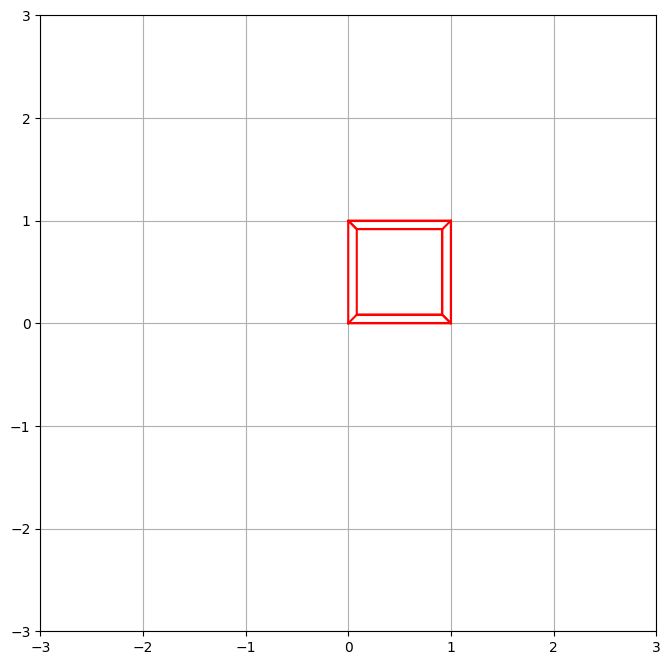

In [17]:
# Define the rotation matrices
def rotation_matrix_x(angle):
    return np.array([
        [1, 0, 0],
        [0, np.cos(np.radians(angle)), -np.sin(np.radians(angle))],
        [0, np.sin(np.radians(angle)), np.cos(np.radians(angle))]
    ])

def rotation_matrix_y(angle):
    return np.array([
        [np.cos(np.radians(angle)), 0, np.sin(np.radians(angle))],
        [0, 1, 0],
        [-np.sin(np.radians(angle)), 0, np.cos(np.radians(angle))]
    ])

# Define the rotation matrix for z-axis
def rotation_matrix_z(angle):
    return np.array([
        [np.cos(np.radians(angle)), -np.sin(np.radians(angle)), 0],
        [np.sin(np.radians(angle)), np.cos(np.radians(angle)), 0],
        [0, 0, 1]
    ])

# Update the animation function to include rotation around the z-axis and translation
def animate(frame):
    ax.clear()
    angle = frame * 2  # Rotate 2 degrees every frame
    # Apply rotation around all three axes
    rotated_vertices = vertices.dot(rotation_matrix_x(angle)).dot(rotation_matrix_y(angle)).dot(rotation_matrix_z(angle))
    # Translate the cube slightly in each frame for visual effect
    translated_vertices = rotated_vertices + np.array([0.005 * frame, 0.005 * frame, 0])
    draw_projected_cube(ax, translated_vertices, edges, [0.5, 0.5, 5 + 0.02 * frame])

fig, ax = plt.subplots(figsize=(8, 8))
ani = animation.FuncAnimation(fig, animate, frames=180, repeat=True)

# Display the updated animation
ani.save('rotating_cube_2.mp4', writer='ffmpeg', fps=30)




-----

## № 2

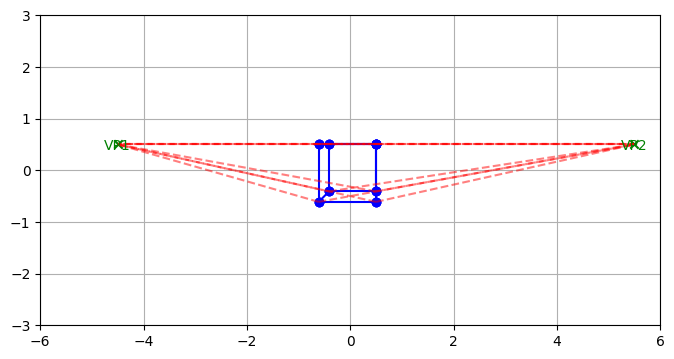

In [30]:
# Updated function to draw the projected cube with vanishing points
def draw_projected_cube_with_vanishing_points_v3(ax, vertices, edges, camera_position):
    """Draw the projected cube and compute the vanishing points for the given camera position."""
    # Projected vertices
    projected_vertices = [project(v, camera_position) for v in vertices]

    # Draw edges
    for edge in edges:
        start, end = edge
        ax.plot([projected_vertices[start][0], projected_vertices[end][0]],
                [projected_vertices[start][1], projected_vertices[end][1]], 'bo-')

    # Calculate vanishing points on Ox axis
    # These are determined by the perspective projection formula when Z coordinate is at infinity
    vanishing_point_left = (camera_position[0] - camera_position[2], camera_position[1])
    vanishing_point_right = (camera_position[0] + camera_position[2], camera_position[1])

    # Draw lines from cube vertices to vanishing points
    for vertex in projected_vertices:
        ax.plot([vertex[0], vanishing_point_left[0]], [vertex[1], vanishing_point_left[1]], 'r--', alpha=0.5)
        ax.plot([vertex[0], vanishing_point_right[0]], [vertex[1], vanishing_point_right[1]], 'r--', alpha=0.5)

    # Mark the vanishing points
    ax.scatter(*vanishing_point_left, color='g', marker='x')
    ax.scatter(*vanishing_point_right, color='g', marker='x')
    ax.text(vanishing_point_left[0], vanishing_point_left[1]-0.1, 'VP1', color='green', ha='center')
    ax.text(vanishing_point_right[0], vanishing_point_right[1]-0.1, 'VP2', color='green', ha='center')

    ax.set_xlim(-6, 6)
    ax.set_ylim(-3, 3)
    ax.set_aspect('equal', 'box')
    ax.grid(True)

# Update the animation function
def animate_vanishing_points_v3(frame):
    ax.clear()
    angle = frame * 2  # Rotate 2 degrees every frame
    # Apply rotation around Ox and Oy
    rotated_vertices = vertices.dot(rotation_matrix_x(angle)).dot(rotation_matrix_y(angle))
    # Translation up and down along Oy
    translation_y = 0.5 * np.sin(0.03 * frame)
    translated_vertices = rotated_vertices + np.array([0, translation_y, 0])
    draw_projected_cube_with_vanishing_points_v3(ax, translated_vertices, edges, [0.5, 0.5, 5])

fig, ax = plt.subplots(figsize=(8, 8))
ani_vp_v3 = animation.FuncAnimation(fig, animate_vanishing_points_v3, frames=360, repeat=True)

# Display the updated animation with vanishing points
ani_vp_v3.save('task_2.mp4', writer='ffmpeg', fps=30)


-----

## №3

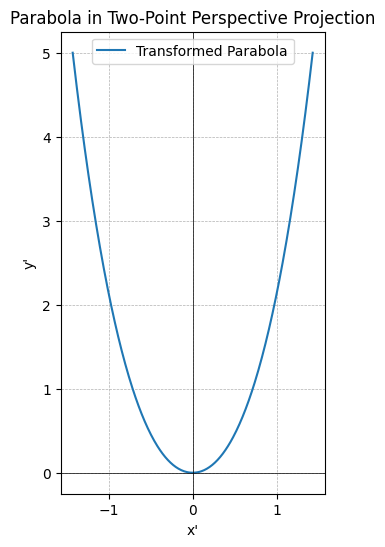

In [33]:
def perspective_projection(x, y, z, p=0, q=0.2, r=-0.1):
    x_prime = x / (z * q + 1)
    y_prime = y / (z * r + 1)
    return x_prime, y_prime

# Define the x-values and compute y = x^2
x = np.linspace(-2, 2, 400)
y = x**2

# Set z as a function of x to simulate perspective depth
z = 1 + 0.5 * np.abs(x)

# Apply the perspective transformation
x_transformed, y_transformed = perspective_projection(x, y, z)

plt.figure(figsize=(10, 6))
plt.plot(x_transformed, y_transformed, label='Transformed Parabola')
plt.title("Parabola in Two-Point Perspective Projection")
plt.xlabel("x'")
plt.ylabel("y'")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.show()
